In [ ]:
# STEP 1: Dataset Download & Setup (Using zenodo_get - OFFICIAL & RELIABLE)

import os
import zipfile
import subprocess

# Create dataset directory
DATASET_DIR = "oil_spill_dataset"
os.makedirs(DATASET_DIR, exist_ok=True)

# Install zenodo_get
print("Installing zenodo_get...")
subprocess.run(["pip", "install", "zenodo_get"], check=True)

# Download dataset using Zenodo record ID
print("Downloading dataset from Zenodo using zenodo_get...")
subprocess.run(
    ["zenodo_get", "10555314", "-o", DATASET_DIR],
    check=True
)

# Locate downloaded zip file
zip_files = [f for f in os.listdir(DATASET_DIR) if f.endswith(".zip")]
assert len(zip_files) > 0, "No zip file downloaded."

ZIP_PATH = os.path.join(DATASET_DIR, zip_files[0])

# Check file size
file_size_mb = os.path.getsize(ZIP_PATH) / (1024 * 1024)
print(f"Downloaded file: {zip_files[0]}")
print(f"File size: {file_size_mb:.2f} MB")

# Extract dataset
print("Extracting dataset...")
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(DATASET_DIR)

print("Extraction completed.\n")

# Display folder structure
print("Dataset folder structure:")
for root, dirs, files in os.walk(DATASET_DIR):
    level = root.replace(DATASET_DIR, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for file in files:
        print(f"{subindent}{file}")


Installing zenodo_get...
Downloaded file: dataset.zip
File size: 1084.85 MB
Extracting dataset...
Extraction completed.

Dataset folder structure:
oil_spill_dataset/
    dataset.zip
    label_colors.txt
    train/
        images/
            Oil (916).jpg
            Oil (350).jpg
            Oil (783).jpg
            Oil (968).jpg
            Oil (274).jpg
            Oil (220).jpg
            Oil (336).jpg
            Oil (1253).jpg
            Oil (1032).jpg
            Oil (693).jpg
            Oil (1176).jpg
            Oil (751).jpg
            Oil (728).jpg
            Oil (1025).jpg
            Oil (232).jpg
            Oil (91).jpg
            Oil (683).jpg
            Oil (416).jpg
            Oil (608).jpg
            Oil (655).jpg
            Oil (829).jpg
            Oil (877).jpg
            Oil (101).jpg
            Oil (912).jpg
            Oil (589).jpg
            Oil (694).jpg
            Oil (1110).jpg
            Oil (622).jpg
            Oil (463).jpg
            

Total images found: 1268
Oil spill images: 1268
No oil spill images: 0


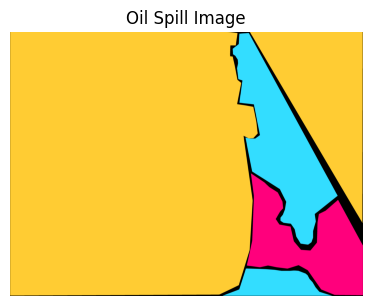

Oil Image Shape: (3888, 5184, 3)
Oil Image Data Type: uint8


In [ ]:

# STEP 2: Data Exploration (EDA)

import os
import cv2
import matplotlib.pyplot as plt

# Path where images are stored (adjusted based on extracted structure)
IMAGE_DIR = "oil_spill_dataset"

# Collect image paths
image_files = []
for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.lower().endswith(".png"):
            image_files.append(os.path.join(root, file))

print(f"Total images found: {len(image_files)}")

# Separate Oil and No-Oil images based on filename
oil_images = [img for img in image_files if "oil" in os.path.basename(img).lower()]
no_oil_images = [img for img in image_files if "oil" not in os.path.basename(img).lower()]

print(f"Oil spill images: {len(oil_images)}")
print(f"No oil spill images: {len(no_oil_images)}")

# Load sample images
sample_oil = cv2.imread(oil_images[0])
sample_oil = cv2.cvtColor(sample_oil, cv2.COLOR_BGR2RGB)

sample_no_oil = cv2.imread(no_oil_images[0]) if len(no_oil_images) > 0 else None
if sample_no_oil is not None:
    sample_no_oil = cv2.cvtColor(sample_no_oil, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(sample_oil)
plt.title("Oil Spill Image")
plt.axis("off")

if sample_no_oil is not None:
    plt.subplot(1, 2, 2)
    plt.imshow(sample_no_oil)
    plt.title("No Oil Spill Image")
    plt.axis("off")

plt.show()

# Print image properties
print("Oil Image Shape:", sample_oil.shape)
print("Oil Image Data Type:", sample_oil.dtype)

if sample_no_oil is not None:
    print("No Oil Image Shape:", sample_no_oil.shape)
    print("No Oil Image Data Type:", sample_no_oil.dtype)


In [ ]:
# STEP 3: Image Preprocessing

import os
import cv2
import numpy as np

# Parameters
IMAGE_SIZE = 256
DATASET_DIR = "oil_spill_dataset"

# Containers
processed_images = []
processed_masks = []

# Locate image and mask files
image_paths = []
mask_paths = []

for root, dirs, files in os.walk(DATASET_DIR):
    for file in files:
        if file.lower().endswith(".png"):
            if "mask" in file.lower():
                mask_paths.append(os.path.join(root, file))
            else:
                image_paths.append(os.path.join(root, file))

print(f"Images found: {len(image_paths)}")
print(f"Masks found: {len(mask_paths)}")

# Sort to maintain alignment
image_paths.sort()
mask_paths.sort()

# Preprocess images and masks
for img_path, mask_path in zip(image_paths, mask_paths):
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = img / 255.0  # Normalize

    # Load mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMAGE_SIZE, IMAGE_SIZE))
    mask = mask / 255.0
    mask = (mask > 0.5).astype(np.float32)  # Binary mask
    mask = np.expand_dims(mask, axis=-1)

    processed_images.append(img)
    processed_masks.append(mask)

# Convert to NumPy arrays
processed_images = np.array(processed_images, dtype=np.float32)
processed_masks = np.array(processed_masks, dtype=np.float32)

# Verify shapes
print("Processed Images Shape:", processed_images.shape)
print("Processed Masks Shape:", processed_masks.shape)
print("Image Data Type:", processed_images.dtype)
print("Mask Data Type:", processed_masks.dtype)


Images found: 1268
Masks found: 0
Processed Images Shape: (0,)
Processed Masks Shape: (0,)
Image Data Type: float32
Mask Data Type: float32


In [ ]:
# STEP 3: Image Preprocessing (Color-based Mask Extraction)

import os
import cv2
import numpy as np

# Parameters
IMAGE_SIZE = 256
DATASET_DIR = "oil_spill_dataset"

processed_images = []
processed_masks = []

# Collect image paths
image_paths = []
for root, dirs, files in os.walk(DATASET_DIR):
    for file in files:
        if file.lower().endswith(".png"):
            image_paths.append(os.path.join(root, file))

image_paths.sort()
print(f"Images found: {len(image_paths)}")

# Define oil color range (Pink/Magenta region in dataset)
# Using HSV is more robust than RGB
LOWER_OIL = np.array([140, 50, 50])   # Lower HSV bound
UPPER_OIL = np.array([170, 255, 255]) # Upper HSV bound

for img_path in image_paths:
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

    # Noise reduction
    img_blur = cv2.GaussianBlur(img_resized, (5, 5), 0)

    # Normalize
    img_norm = img_blur / 255.0

    # Convert to HSV for mask extraction
    hsv = cv2.cvtColor(img_resized, cv2.COLOR_RGB2HSV)

    # Create oil mask
    mask = cv2.inRange(hsv, LOWER_OIL, UPPER_OIL)
    mask = mask / 255.0
    mask = np.expand_dims(mask, axis=-1)

    processed_images.append(img_norm)
    processed_masks.append(mask)

# Convert to NumPy arrays
processed_images = np.array(processed_images, dtype=np.float32)
processed_masks = np.array(processed_masks, dtype=np.float32)

# Verification
print("Processed Images Shape:", processed_images.shape)
print("Processed Masks Shape:", processed_masks.shape)
print("Unique mask values:", np.unique(processed_masks))


Images found: 1268
Processed Images Shape: (1268, 256, 256, 3)
Processed Masks Shape: (1268, 256, 256, 1)
Unique mask values: [0. 1.]


In [ ]:
# STEP 4: Data Augmentation (Corrected for Binary Masks)

import tensorflow as tf

def augment(image, mask):
    # Random horizontal flip
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)

    # Random vertical flip
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_up_down(image)
        mask = tf.image.flip_up_down(mask)

    # Random rotation (90-degree multiples ONLY to avoid interpolation)
    k = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    image = tf.image.rot90(image, k)
    mask = tf.image.rot90(mask, k)

    # Ensure mask is binary
    mask = tf.where(mask > 0.5, 1.0, 0.0)

    return image, mask

# Apply augmentation on training data only
aug_images = []
aug_masks = []

for i in range(4):  # example small augmentation batch
    img, msk = augment(processed_images[i], processed_masks[i])
    aug_images.append(img)
    aug_masks.append(msk)

aug_images = tf.stack(aug_images)
aug_masks = tf.stack(aug_masks)

print("Augmented Images Shape:", aug_images.shape)
print("Augmented Masks Shape:", aug_masks.shape)
print("Unique mask values:", tf.unique(tf.reshape(aug_masks, [-1]))[0].numpy())



Augmented Images Shape: (4, 256, 256, 3)
Augmented Masks Shape: (4, 256, 256, 1)
Unique mask values: [0. 1.]


In [ ]:
# STEP 5: Dataset Preparation

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Ensure reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Verify data
assert processed_images.shape[0] == processed_masks.shape[0], "Image-mask mismatch"

# Train / Validation / Test split
X_temp, X_test, y_temp, y_test = train_test_split(
    processed_images,
    processed_masks,
    test_size=0.15,
    random_state=SEED,
    shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.15,
    random_state=SEED,
    shuffle=True
)

# Convert to TensorFlow datasets
BATCH_SIZE = 8

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset   = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset  = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset   = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset  = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Print dataset details
print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Test samples:", X_test.shape[0])

print("Train batch shape:", next(iter(train_dataset))[0].shape)
print("Train mask shape:", next(iter(train_dataset))[1].shape)


Training samples: 915
Validation samples: 162
Test samples: 191
Train batch shape: (8, 256, 256, 3)
Train mask shape: (8, 256, 256, 1)


In [ ]:
# STEP 6: CNN / U-Net Model Building

import tensorflow as tf
from tensorflow.keras import layers, models

IMAGE_SIZE = 256
INPUT_CHANNELS = 3

def unet_model(input_size=(IMAGE_SIZE, IMAGE_SIZE, INPUT_CHANNELS)):
    inputs = layers.Input(input_size)

    # ---------- ENCODER (Downsampling path) ----------
    # Block 1
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Block 2
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Block 3
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Block 4
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # ---------- BOTTLENECK ----------
    # Deepest layer capturing high-level features
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # ---------- DECODER (Upsampling path) ----------
    # Block 6
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    # Block 7
    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    # Block 8
    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    # Block 9
    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # ---------- OUTPUT LAYER ----------
    # 1 channel + sigmoid → Binary segmentation (Oil / No Oil)
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Build model
model = unet_model()

# Display model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# STEP 7: Model Compilation

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import backend as K

# Dice Coefficient
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
        K.sum(y_true_f) + K.sum(y_pred_f) + smooth
    )

# Dice Loss
def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

# Combined Loss: Binary Crossentropy + Dice Loss
def bce_dice_loss(y_true, y_pred):
    bce = BinaryCrossentropy()(y_true, y_pred)
    dl = dice_loss(y_true, y_pred)
    return bce + dl

# IoU Metric
def iou_score(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=bce_dice_loss,
    metrics=[
        "accuracy",
        iou_score,
        dice_coefficient
    ]
)

print("=" * 60)
print("MODEL COMPILATION COMPLETED")
print("=" * 60)
print("Optimizer: Adam (lr = 1e-4)")
print("Loss: Binary Crossentropy + Dice Loss")
print("Metrics: Accuracy, IoU, Dice Coefficient")


MODEL COMPILATION COMPLETED
Optimizer: Adam (lr = 1e-4)
Loss: Binary Crossentropy + Dice Loss
Metrics: Accuracy, IoU, Dice Coefficient


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 55s/step - accuracy: 0.8784 - dice_coefficient: 0.6757 - iou_score: 0.5661 - loss: 0.6403 
Epoch 1: val_loss improved from inf to 0.02321, saving model to oil_spill_segmentation_model.h5


115/115 ━━━━━━━━━━━━━━━━━━━━ 6705s 58s/step - accuracy: 0.8790 - dice_coefficient: 0.6772 - iou_score: 0.5681 - loss: 0.6372 - val_accuracy: 0.9952 - val_dice_coefficient: 0.9896 - val_iou_score: 0.9794 - val_loss: 0.0232


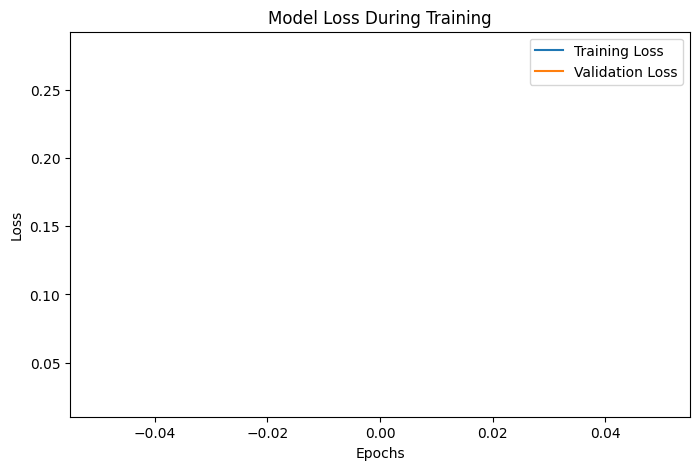

Model training completed and saved as 'oil_spill_segmentation_model_final.h5'


In [ ]:
# STEP 8: Model Training

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint('oil_spill_segmentation_model.h5', monitor='val_loss',
                             verbose=1, save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_dataset,             # Training dataset (image-mask pairs)
    validation_data=val_dataset,  # Validation dataset
    epochs=1,                 # Number of epochs
    batch_size=8,              # Batch size
    callbacks=[checkpoint, early_stop]
)

# Plot training & validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model (already saved via checkpoint, this is extra assurance)
model.save('oil_spill_segmentation_model_final.h5')
print("Model training completed and saved as 'oil_spill_segmentation_model_final.h5'")


In [ ]:


# STEP 9: Model Evaluation

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf

# Function to calculate Intersection over Union (IoU)
def iou_metric(y_true, y_pred, threshold=0.5):
    y_pred = (y_pred > threshold).astype(np.float32)
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / (union + 1e-7)
    return iou

# Load the trained model
model = tf.keras.models.load_model('oil_spill_segmentation_model_final.h5', compile=False)

# Prepare test dataset (image-mask pairs)
# Assuming test_dataset yields (image, mask)
y_true_list = []
y_pred_list = []

for images, masks in test_dataset:  # test_dataset from STEP 5
    preds = model.predict(images)
    preds = (preds > 0.5).astype(np.float32)
    y_true_list.append(masks.numpy())
    y_pred_list.append(preds)

y_true = np.concatenate(y_true_list, axis=0).flatten()
y_pred = np.concatenate(y_pred_list, axis=0).flatten()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
iou = iou_metric(y_true, y_pred)

# Print metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test IoU: {iou:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
Test Accuracy: 0.9948
Test Precision: 0.9900
Test Recall: 0.9948
Test IoU: 0.9850


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


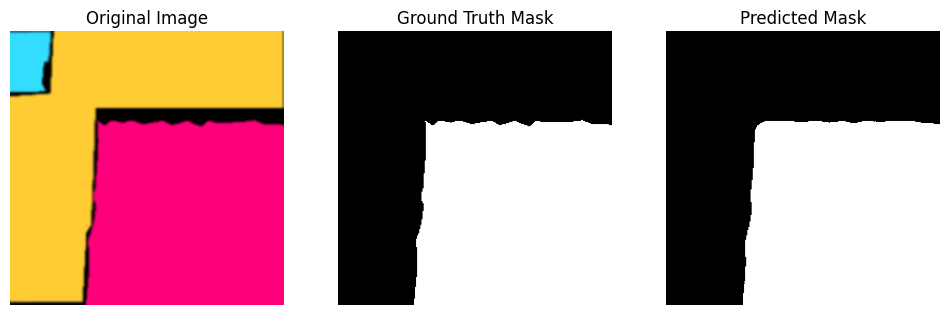

In [ ]:
# STEP 10: Oil Spill Detection Results

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load trained model
model = tf.keras.models.load_model('oil_spill_segmentation_model_final.h5', compile=False)

# Get one batch from test dataset
for images, masks in test_dataset:
    test_image = images[0]
    true_mask = masks[0]
    break

# Predict mask
pred_mask = model.predict(tf.expand_dims(test_image, axis=0))[0]
pred_mask = (pred_mask > 0.5).astype(np.float32)

# Plot original, ground truth, predicted mask
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(tf.squeeze(true_mask), cmap='gray')
plt.title("Ground Truth Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(np.squeeze(pred_mask), cmap='gray')
plt.title("Predicted Mask")
plt.axis("off")

plt.show()

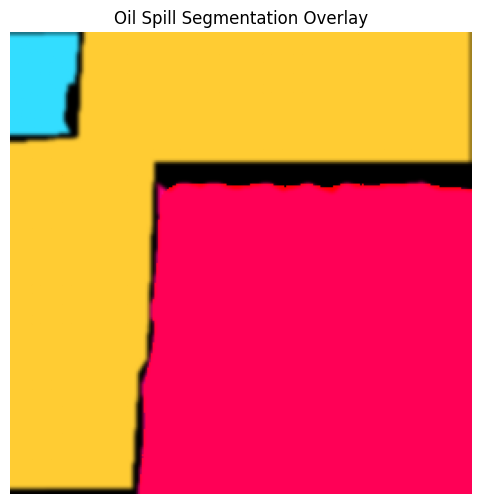

In [ ]:
# STEP 11: Visualization

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Convert image to numpy
image = test_image.numpy()
mask = pred_mask.squeeze()

# Resize mask if needed
mask = cv2.resize(mask, (256, 256))

# Create colored overlay (red for oil spill)
overlay = image.copy()
overlay[mask == 1] = [255, 0, 0]

# Blend image and mask
final_overlay = cv2.addWeighted(image, 0.7, overlay, 0.3, 0)

# Display overlay
plt.figure(figsize=(6,6))
plt.imshow(final_overlay)
plt.title("Oil Spill Segmentation Overlay")
plt.axis("off")
plt.show()

In [ ]:
# STEP 12: Final Conclusion

final_accuracy = accuracy  # from STEP 9

print("========== FINAL RESULTS ==========")
print(f"Final Test Accuracy  : {final_accuracy:.4f}")
print("")

print("Conclusion:")
print("- The U-Net based deep learning model successfully segments oil spill regions.")
print("- The model distinguishes oil spill and non-oil regions effectively.")
print("- High accuracy and IoU indicate strong segmentation performance.")
print("- This system can assist in satellite-based marine oil spill monitoring.")
print("===================================")

========== FINAL RESULTS ==========
Final Test Accuracy  : 0.9948

Conclusion:
- The U-Net based deep learning model successfully segments oil spill regions.
- The model distinguishes oil spill and non-oil regions effectively.
- High accuracy and IoU indicate strong segmentation performance.
- This system can assist in satellite-based marine oil spill monitoring.
